# MaunaLoa Temperature Time Series

**References:**
- ARIMA Model in Python Time Series Forecasting #6. Nachiketa Hebbar
- ARIMA for Time Series Forecasting; A Complete Guide. Zaina Saadeddin
- Time Series Forecasting with ARIMA: Everything You Need to Know!. Nayeem Islam



In [ ]:
# Install pmdarima library
# pmdarima does not support Numpy 2.0

import pmdarima as pm


In [ ]:
!python --version

Python 3.11.11


- python 3.11.11
- numpy 1.23.2
- pandas 2.2.2

In [ ]:
!pip uninstall numpy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install numpy==1.23.2

  Using cached numpy-1.23.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
Using cached numpy-1.23.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.15.2 requires numpy<2.5,>=1.23.5, but you have numpy 1.23.2 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.2 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.2 which is incompatible.
plotnine 0.14.5 requires numpy>=1.23.5, but you have numpy 1.23.2 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.2 which is incompatible.
mizani 0.13.1 requires numpy>=1.23.5, but you have numpy 1.23.2 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.23.2 which is incompatible.
pandas-stubs

In [ ]:
!pip uninstall pandas

Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/pandas-2.2.3.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-2.2.3


In [ ]:
!pip install pandas==2.2.2

  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)


In [ ]:
!pip install pmdarima

In [ ]:
# Load libraries
import pandas as pd
import numpy as np

## Read Data: MaunaLoa Daily Temperatures

In [ ]:
# read csv file
df = pd.read_csv('/content/MaunaLoaDailyTemps-1.csv', index_col='DATE', parse_dates=True)

# drop missing values
df = df.dropna()

# Show dataset
print('Shape of data', df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


The dataset has 1,821 rows and 5 columns.

<Axes: xlabel='DATE'>

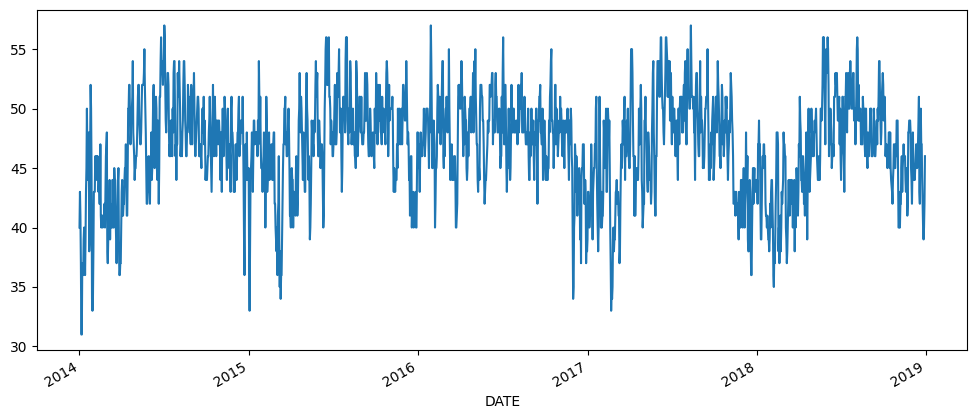

In [ ]:
# plot data
df['AvgTemp'].plot(figsize=(12,5))

## Is Data Stationary?

<p>If P-vlaue < 0.05, data is stationary</p>
<p>If P-value > 0.05, data is not stationary.  Data has an increasing for decreasing trend/p>

In [ ]:
# Function to check whether data is stationary or not
# Modeled time series data needs to be stationary
# The time series mean, variance, etc are constant over time

from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. P-Value: ", dftest[1])
  print("3. Num of Lags: ", dftest[2])
  print("4. Num of Observations Used for ADF Regression and Critical Values Calculation: ", dftest[3])
  print("5. Critical Values : ")
  for key, val in dftest[4].items():
    print("\t", key, ": ", val)

   # Interpret the results
  if dftest[1] > 0.05:
     print("The data is not stationary.")
  else:
     print("The data is stationary.")

In [ ]:
 # P-value should be as low as possible. < 0.05

ad_test(df['AvgTemp'])

1. ADF:  -6.554680125068777
2. P-Value:  8.675937480199653e-09
3. Num of Lags:  12
4. Num of Observations Used for ADF Regression and Critical Values Calculation:  1808
5. Critical Values : 
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872
The data is stationary.


<pre>ARIMA Model has three parts
Auto-Regression: used previous values to make a future prediction

Moving Average uses past errors to make future predictions

Integrated performs a difference operation to make the data stationary. It subtracts the previous value from each value.
</pre>

## Find the Best ARIMA Model

In [ ]:
# Load auto_arima
from pmdarima import auto_arima
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Find the best ARIMA model
stepwise_fit = auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.294, Time=4.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=5.38 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.324, Time=3.77 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.606, Time=3.82 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=5.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.514, Time=4.54 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.054, Time=5.42 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.479, Time=6.36 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.268, Time=4.84 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.907
Date:                Mon, 31 Mar 2025   AIC                           8295.814
Time:                        04:09:28   BIC                           8339.871
Sample:                             0   HQIC                          8312.068
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3625      0.397      3.429      0.001       0.584       2.141
ar.L1          0.9707      0.009    113.365      0.000       0.954       0.987
ma.L1         -0.1219      0.024     -5.083      0.000      -0.169      -0.075
ma.L2         -0.2155      0.024     -8.836      0.000      -0.263      -0.168
ma.L3         -0.2028      0.024     -8.424      0.000      -0.250      -0.156
ma.L4         -0.1345      0.023     -5.885      0.000      -0.179      -0.090
ma.L5         -0.0459      0.024     -1.879      0.060      -0.094       0.002
sigma2         5.5010      0.172     31.927      0.000       5.163       5.839
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best arima model is ARIMA(1,0,5).
- p: The number of past values (lags) considered in the AR term. 1
- d: The degree of differencing applied to the data. 0
- q: The number of past forecast errors included in the MA term. 5




In [ ]:
# Load ARIMA
from statsmodels.tsa.arima.model import ARIMA

## Split Data into Train and Test

In [ ]:
print(df.shape)
train = df.iloc[:-30]  # all values except the last 30 values
test = df.iloc[-30:] #last 30 values

print(train.shape, test.shape)

(1821, 5)
(1791, 5) (30, 5)


## Train the Model

In [ ]:
model = ARIMA(train['AvgTemp'], order=(1,0,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Mon, 31 Mar 2025   AIC                           8156.395
Time:                        02:17:28   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Make a prediction on the test data then compare to actual

start=len(train)
end=len(train)+len(test)-1
#pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions').rename('ARIMA Predictions')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index = df.index[start:end+1]
print(pred)


DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933418
2018-12-13    45.942808
2018-12-14    45.952063
2018-12-15    45.961185
2018-12-16    45.970175
2018-12-17    45.979036
2018-12-18    45.987769
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045481
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075922
2018-12-30    46.083261
Name: ARIMA Predictions, dtype: float64


In [ ]:
print(test['AvgTemp'])

DATE
2018-12-01    44.0
2018-12-02    42.0
2018-12-03    45.0
2018-12-04    48.0
2018-12-05    45.0
2018-12-06    44.0
2018-12-07    45.0
2018-12-08    44.0
2018-12-09    45.0
2018-12-10    46.0
2018-12-11    47.0
2018-12-12    47.0
2018-12-13    45.0
2018-12-14    46.0
2018-12-15    47.0
2018-12-16    49.0
2018-12-17    51.0
2018-12-18    43.0
2018-12-19    42.0
2018-12-20    48.0
2018-12-21    50.0
2018-12-22    47.0
2018-12-23    47.0
2018-12-24    44.0
2018-12-25    42.0
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, dtype: float64


<Axes: xlabel='DATE'>

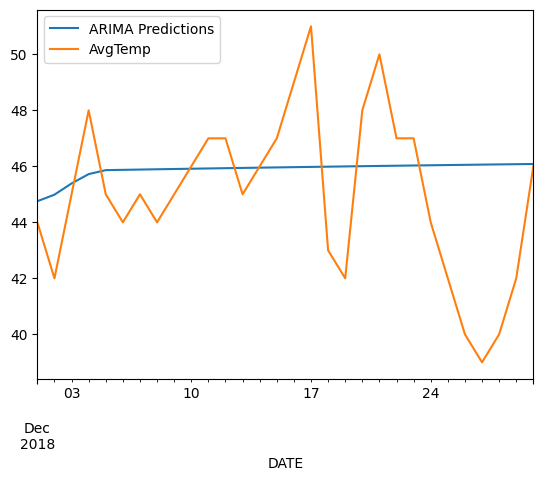

In [ ]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

## Plot Train, Test, & Predicted Data

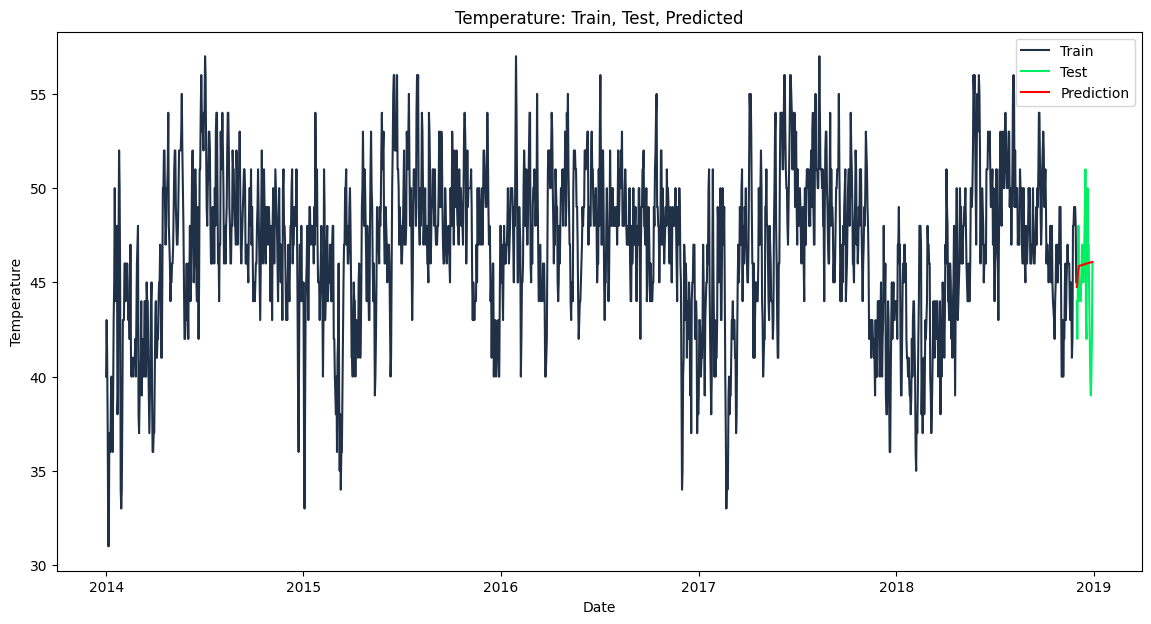

In [ ]:
# Load matplotlib
import matplotlib.pyplot as plt

# Define plot
plt.figure(figsize=(14,7))
plt.plot(train.index, train["AvgTemp"], label='Train', color='#203147') # train data
plt.plot(test.index, test["AvgTemp"], label='Test', color='#01ef63')    # test data
plt.plot(test.index, pred, label='Prediction', color='red')           # forecasted data
plt.title('Temperature: Train, Test, Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [ ]:
test['AvgTemp'].mean()

45.0

The average for the test data is 45.

In [ ]:
pred = pred[:len(test)]
test_temp = test['AvgTemp'][:len(forecast)]

# Calculate RMSE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_temp,pred))
print(f"RMSE: {rmse: .4f}")

RMSE:  3.0005


On average predictions are off by +/- 3 degrees.  

## Forecast Past the End of the Original Data
**Forecast: 2018-12-31 to 2109-04-09**

In [ ]:
# Forecast future value
forecast = model_fit.forecast(steps = 100)

print(forecast)

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721545
1795    45.863733
          ...    
1886    46.392716
1887    46.395493
1888    46.398231
1889    46.400928
1890    46.403587
Name: predicted_mean, Length: 100, dtype: float64


In [ ]:
forecast.index = pd.date_range(start=df.index[-1], periods=101, inclusive="right")
print(forecast)

2018-12-31    44.754109
2019-01-01    44.987795
2019-01-02    45.388741
2019-01-03    45.721545
2019-01-04    45.863733
                ...    
2019-04-05    46.392716
2019-04-06    46.395493
2019-04-07    46.398231
2019-04-08    46.400928
2019-04-09    46.403587
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


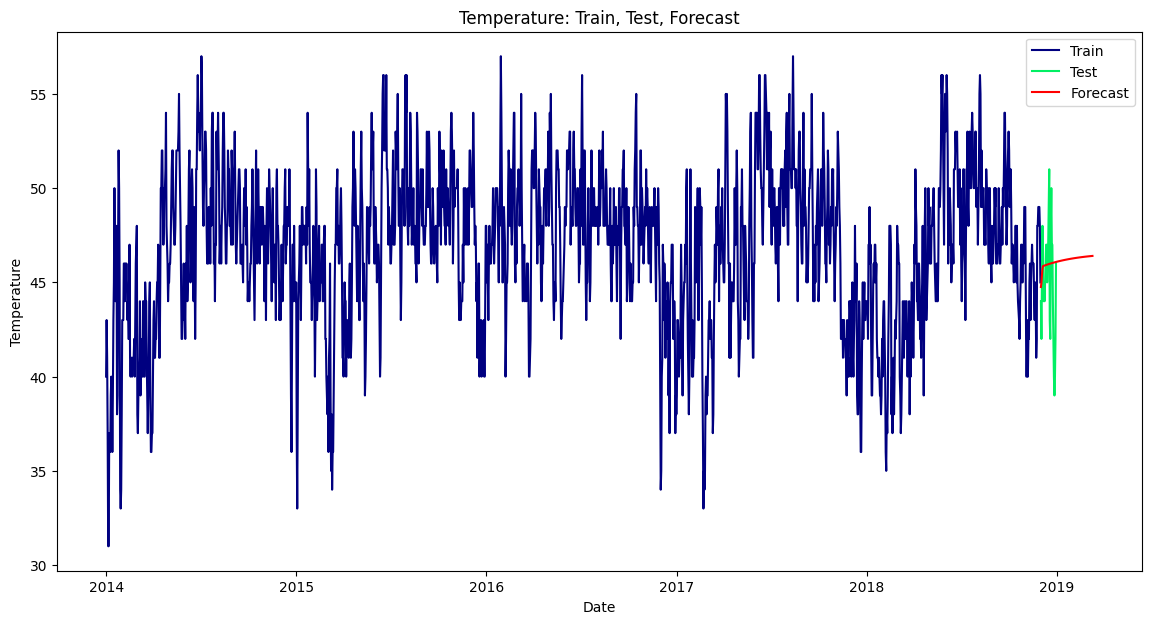

In [ ]:
last_date = train.index[-1]
forecast_index = pd.date_range(last_date,periods=101, inclusive="right")

# Define plot
plt.figure(figsize=(14,7))
plt.plot(train.index, train["AvgTemp"], label='Train', color="navy") # train data
plt.plot(test.index, test["AvgTemp"], label='Test', color='#01ef63') # test data
plt.plot(forecast_index,forecast, label='Forecast', color='red')    # forecasted data
plt.title('Temperature: Train, Test, Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

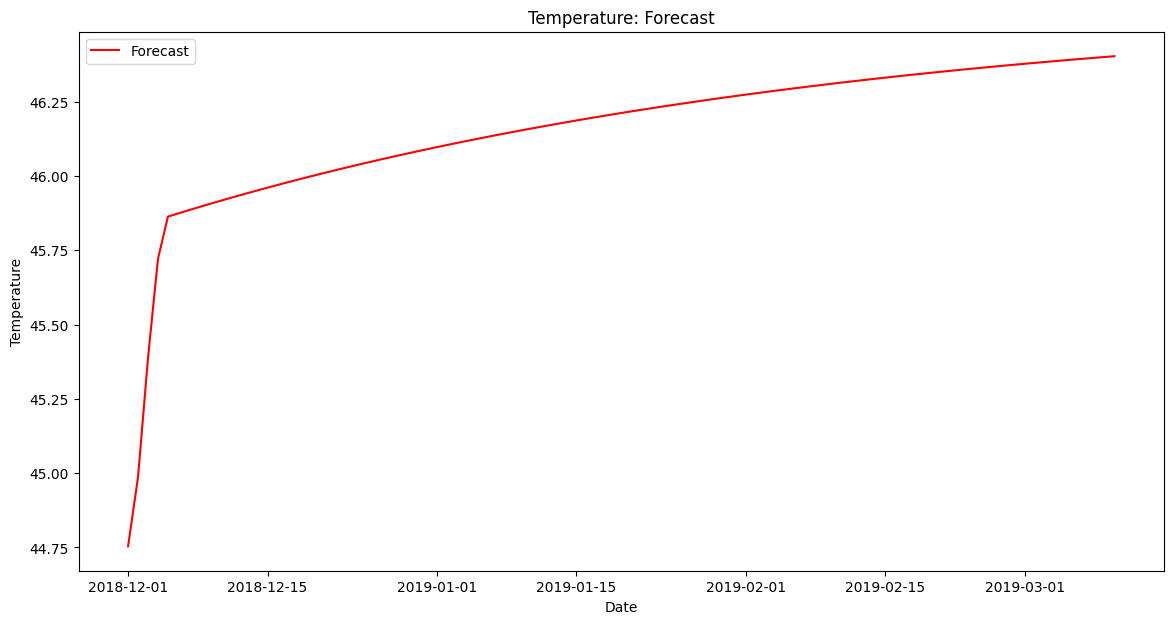

In [ ]:

last_date = train.index[-1]
forecast_index = pd.date_range(last_date,periods=101, inclusive="right")

# Define plot
plt.figure(figsize=(14,7))
#plt.plot(train.index, train["AvgTemp"], label='Train', color="navy") # train data
#plt.plot(test.index, test["AvgTemp"], label='Test', color='#01ef63') # test data
plt.plot(forecast_index,forecast2, label='Forecast', color='red')    # forecasted data
plt.title('Temperature: Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()